# Exploratory Data Analysis (EDA) Team 67 place to pay

In this file we will continue a deeper analysis exploration based on the previous document named 'Data exploration'


## Introduction

In the previous version of this document the exploration analysis was made using a sample of 1 million transactions due the size of the complete data base which is 12 million transactions (rows) with 47 column attributes. This document will use all available data.

If memory is an issue, we also can run this notebook with a 10% random sample of all available transactions and columns after the cleaning process, wich now is 9.85 million transactions with 32 attributes.

The biggest remarks gathered at the end of that analysis were:

*   From 47 initial columns in the dataset, 15 columns are discarded for further analisys. This because we discover these columns are not providing useful information for the characterization and profiling of the users and merchants.

*   The data base do not have a large portion of misssing values. We are not going to drop any value yet.

### Statistical methods: 
By analyzing the data using the values of mean, standard deviation, range, or clustering algorithms, it is possible for an expert to find values that are unexpected and thus erroneous. Although the correction of such data is difficult since the true value is not known, it can be resolved by setting the values to an average or other statistical value. Statistical methods can also be used to handle missing values which can be replaced by one or more plausible values, which are usually obtained by extensive data augmentation algorithms.

The main tasks conducted in this notebook are:
* Plotting the raw data (such as data traces, histograms, bihistograms, probability plots, lag plots, block plots, and Youden plots.
* Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effects plots of the raw data.
* Marginal distributions of all variables.
* frequency tables, word clouds, and contingency tables for categorical variables




## Load Updated Database from last notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
# To load a file into colab:
import io
import os

### Pickle files into Google Drive:

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
DATA_PATH = "/placetopayDB4_pickle"
infile = open(DATA_PATH,'rb')
bd = pickle.load(infile)

CPU times: user 7.5 s, sys: 2.72 s, total: 10.2 s
Wall time: 14.2 s


In [ ]:
bd.shape

(9849696, 32)

### Feather file into Jupyter

In [ ]:
pwd 

'/home/jovyan/work/PROJECT/Notebooks'

In [ ]:
cd ../Data

/home/jovyan/work/PROJECT/Data


In [ ]:
ls

 placetopayDB3.ftr*
 placetopayDB3_pickle*
 placetopayDB4.csv*
 placetopayDB4.ftr*
 placetopayDB4_pickle*
'Reto MinTIC - Inferencia-y-Recomendacion-personalizada.csv'*
'Reto MinTIC - Inferencia-y-Recomendacion Teams 90-67-89.csv'*


In [ ]:
%%time
# $ pip install feather-format
import feather

# To read feather-format:
bd = pd.read_feather("./placetopayDB4.ftr", columns=None, use_threads=True)

In [ ]:
# Alternatively:
#%%time
#bd = feather.read_dataframe("./placetopayDB4.ftr") # do the same, alternatively
#bd.shape

In [ ]:
# Working only with a random sample of the dataset, if memory is not available:
#bd = bd.sample(frac =.10) 

We confirm the datset is loaded correctly 

In [ ]:
print(f'shape of bd: {bd.shape}')
bd.head()

shape of bd: (9849696, 32)


transaction_user_agent  ... isic_section_name
0  Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...  ...               NaN
1  Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...  ...               NaN
2  Mozilla/5.0 (Linux; Android 8.0.0; SM-G930F) A...  ...               NaN
3  Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-G97...  ...               NaN
4  Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...  ...               NaN

[5 rows x 32 columns]

We confirm the new data columns correspond the updated dictionary

In [ ]:
print(f'Dataset total columns: {len(bd.columns)}')
bd.columns

Dataset total columns: 32


Index(['transaction_user_agent', 'transaction_id', 'transaction_description',
       'transaction_processing_date_', 'transaction_processing_hour',
       'transaction_request_language', 'transaction_payer_id',
       'transaction_payer_document_type', 'transaction_processing_amount',
       'transaction_card_issuer_name', 'transaction_card_type',
       'transaction_card_installments', 'transaction_response_code', 'site_id',
       'site_channel', 'site_category', 'merchant_id', 'merchant_enabled',
       'merchant_address_city', 'merchant_created', 'merchant_classification',
       'ip_location_region_name', 'ip_location_city', 'card_id',
       'card_issuer_country', 'card_class', 'card_country',
       'paymentmethod_name', 'paymentmethod_franchise', 'paymentmethod_type',
       'isic_division_name', 'isic_section_name'],
      dtype='object')

## Updated dictionary

We continued working with the database, using only the columns that we considered that had valuable information, and dropping all the columns that had:

* Repeated columns or

* Constant value for all the rows
* Irrelevant information, as error codes for transactions declined
* Highly correlated columns, as detailed descriptions of error codes
* repeated columns, as code Ids for categories, where we only need the category names.


We concatenate all the useful columns and the new columns the team has chosen a are the following:

 **User Attributes**  

| Field          | Type         | Description  |
| :------------- | :----------: | -----------: |
| transaction_user_agent        | STRING          |Device from which the transaction was made   
| transaction_payer_id          | STRING          |Payer ID number (ID, passport, etc.), hashed
| transaction_payer_document_type| STRING         |Document type (CC, NIT, etc) |
| Ip_location_region_name       | STRING          |Region from where the transaction was made
| Ip_location_city              | STRING          |City from where the transaction was made
| Card_id                       | STRING          |Card number, hashed
| card_issuer_country           | STRING          |Country of issuing bank
| Card_class                    | STRING          |Card class
| Card_country                  | STRING          |Country of card issuance

 **Transaction Attributes:**

| Field          | Type         | Description  |
| :------------- | :----------: | -----------: |
|transaction_id                  | STRING          | Transaction ID  |
|transaction_description         | STRING          | Destails of purchase / product, depends on merchants interpretation
|transaction_processing_date     | STRING ->DATE   | Date transaction was performed  
|transaction_processing_hour     | INTEGER         | Hour of transaction  
|transaction_request_language    | STRING          |  
|transaction_processing_amount   | STRING ->FLOAT  | Purchase value, transaction amount
|transaction_card_issuer_name    | STRING          |Bank issuing the card
|transaction_card_type           | STRING          |type of card C-Credito, D-Debito, A-Ahorros, R-Corriente
|transaction_card_installments   | INTEGER         |#of installments paid (only applies to credit card)
|transaction_response_code       | STRING          |
|paymentmethod_name              | STRING          |Name of the payment method
|paymentmethod_franchise         | STRING          |Associated Frachise
|paymentmethod_type              | STRING          |Type of payment method |



 **Merchant Attributes**  

| Field          | Type          | Description  |
| :------------- | :-----------: | -----------: |
| Site_id                   | STRING          |Unique identifier of the site
| Site_channel              | STRING          |Channel through which the transaction was made:
| | |INTERNET = Non-face-to-face transaction (online)
| | |IVR = Transaction by telephone
| | |POS = Transaction made from a physical terminal
| Site_category             | STRING          |Site category
| Merchant_id               | INTEGER         |Identifier of the merchant. Remember that a business can have n number of sites. Merchant / Store ID where transaction was made  
| Merchant_enabled          | STRING          |If the merchant is active or not to date
| Merchant_address_city     | STRING          |City where the business is located
| Merchant_created          | STRING          |Date of creation of the trade, that is, from when the merchant is using the platform
| Merchant_classification   | STRING          |A + = More than 50k average transactions per month, A = Between 10k and 50k, B + = between 5k and 10k, B = Between 2k and 5k, N = Created in the current year
| Isic_division_name        | FLOAT           |name of Business activity of the merchant 
| Isic_section_name         | FLOAT           |name of the trade's economic activity of the merchant

# 1- Basic exploration: Basic statistics
Taking into account the new data set. There are 32 columns:

* transaction_payer_id
* card_id
* transaction_id
* transaction_amount
* merchant_id
* site_id (is nested with merchant_id)
and
* transaction_dat and transaction_hour

Are the main variables against all the rest categorical variables can be compared initially. 

## Describing Numerical Variables

here are the 7-point statistics for the numeric variables:

In [ ]:
bd['transaction_processing_hour', 'transaction_card_installments', 'transaction_processing_amount'].describe()

transaction_processing_hour  transaction_processing_amount  \
count                 9.849696e+06                   9.849696e+06   
mean                  1.376428e+01                   4.265348e+05   
std                   4.501591e+00                   1.085177e+06   
min                   0.000000e+00                   0.000000e+00   
25%                   1.000000e+01                   5.460200e+04   
50%                   1.400000e+01                   1.414630e+05   
75%                   1.700000e+01                   3.900500e+05   
max                   2.300000e+01                   1.636810e+08   

       transaction_card_installments  
count                   3.606179e+06  
mean                    3.714745e+00  
std                     6.657698e+00  
min                     1.000000e+00  
25%                     1.000000e+00  
50%                     1.000000e+00  
75%                     3.000000e+00  
max                     6.000000e+01

## Inspecting each variable:

In [ ]:
# Transaction identifier
bd.transaction_id.describe()
#transaction_id.unique()

count           9849696
unique          9849696
top       COA1489402020
freq                  1
Name: transaction_id, dtype: object

#### Respose Codes:
We wanted to see the values or response codes of transactions

In [ ]:
# Respose Codes:
tr = bd.transaction_response_code.value_counts()
print("No.of.unique values in each column :\n", tr)

No.of.unique values in each column :
 APPROVED    7104898
REJECTED    2587897
FAILED       156824
PENDING          77
Name: transaction_response_code, dtype: int64


#### Transaction Descriptions
 We wanted to know how many transactions per subcategory we have

In [ ]:
# How many different types of transaction there are?
print(bd.transaction_description.describe(), '\n', bd.transaction_description.unique())

count                      9094973
unique                     1842799
top       Pago Polizas Financiadas
freq                        723147
Name: transaction_description, dtype: object 
 ['Pago con QR' 'Pago por QR' '4395' ... '001629791-000000000000'
 '001619025-000000000000' '001602568-000000000000']


In [ ]:
# Which are the most common transaction descriptions?
unique_description = len(bd['transaction_description'].unique())
print(unique_description)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(bd['transaction_description'].value_counts()[:200])

1842800


Pago Polizas Financiadas                                                       723147
PAGO IMPUESTO VEHICULAR                                                        505383
Pago Seguros de vida                                                           476150
Pago EPS                                                                       380919
SOAT                                                                           350811
Pago Mapfre Seguros Colombia                                                   282026
Pago de Servicios de AXA COLPATRIA                                             249476
Impuesto predial                                                               248429
EPS CUOTA MODERADORA Y COPAGO RDS                                              226521
Pago Seguros generales                                                         203825
PAGO LOTERIA LOTTIRED                                                          201656
Pagos desde miavantel de facturas-PTP                 


 This plot shows the distribution respect transaction descriptions (Top 10 transaction)

                  transaction_description       0
0                Pago Polizas Financiadas  723147
1                 PAGO IMPUESTO VEHICULAR  505383
2                    Pago Seguros de vida  476150
3                                Pago EPS  380919
4                                    SOAT  350811
5            Pago Mapfre Seguros Colombia  282026
6      Pago de Servicios de AXA COLPATRIA  249476
7                        Impuesto predial  248429
8       EPS CUOTA MODERADORA Y COPAGO RDS  226521
9                  Pago Seguros generales  203825
10                  PAGO LOTERIA LOTTIRED  201656
11  Pagos desde miavantel de facturas-PTP  113641
12                           MERCADOLIBRE  110809
13                  certificadosvirtuales   90442
14                     CREDITO FINANZAUTO   76943
15                Pago multas de tránsito   75799
16                            MERCADOPAGO   69510
17      Pago de cuota del acuerdo de pago   57336
18                 Recarga Tarjeta Cineco   53100


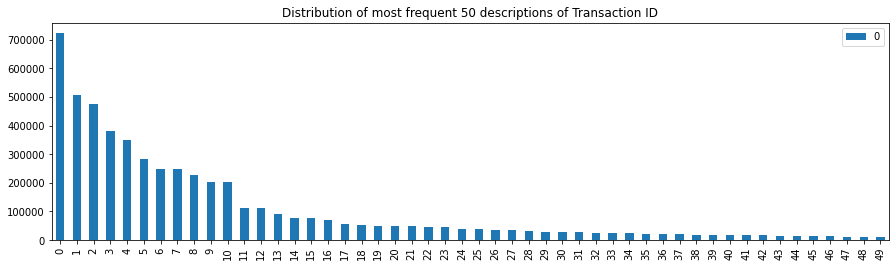

In [ ]:
%matplotlib inline
# Which are the most common transaction descriptions? 
TransactionType = bd.groupby('transaction_description').size().reset_index().sort_values(by=[0], ascending=False)
TransactionType = TransactionType.reset_index(drop = True)
print(TransactionType.head(20))
TransactionType.head(50).plot(figsize=(15, 4), kind = 'bar', title = 'Distribution of most frequent 50 descriptions of Transaction ID')

In [ ]:
# How much value carry each transaction description?
bd.groupby('transaction_description').agg({'transaction_processing_amount':['mean','min','max','count']}).sort_values(by=('transaction_processing_amount', 'count'), ascending=False)

transaction_processing_amount  ...        
                                                                            mean  ...   count
transaction_description                                                           ...        
Pago Polizas Financiadas                                            2.772935e+05  ...  723147
PAGO IMPUESTO VEHICULAR                                             3.666885e+05  ...  505383
Pago Seguros de vida                                                8.552082e+05  ...  476150
Pago EPS                                                            1.558723e+05  ...  380919
SOAT                                                                4.871748e+05  ...  350811
...                                                                          ...  ...     ...
76209039467                                                         5.330000e+04  ...       1
76209039403                                                         2.931000e+05  ...       1
76209039393                                                         1.350100e+06  ...       1
76209039330                                                         1.451000e+05  ...       1
Alcaldia de Bucaramanga - Impuesto Predial - PU...                  5.460000e+05  ...       1

[1842799 rows x 4 columns]

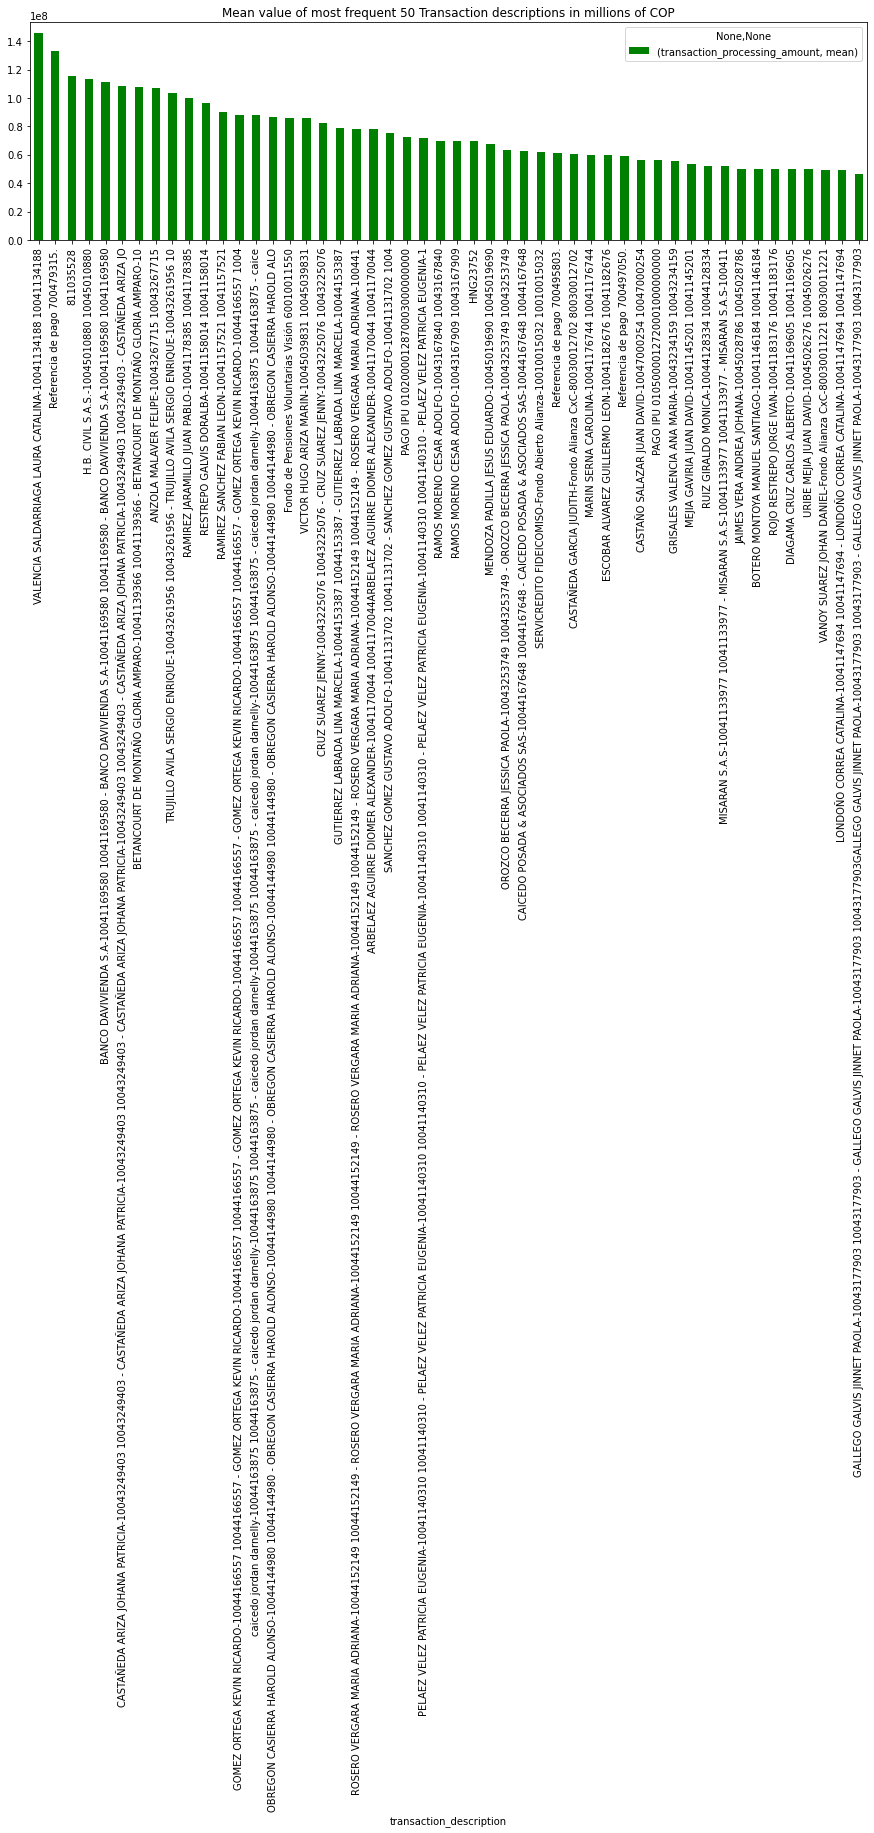

In [ ]:
# How much value carry, on average, each transaction description? (in hundreds of millions of COP)

TransactionValue = bd.groupby('transaction_description').agg({'transaction_processing_amount':['mean']}).sort_values(by=('transaction_processing_amount', 'mean'), ascending=False)
TransactionValue.head(50).plot(figsize=(15, 4), kind = 'bar', color='green', title = 'Mean value of most frequent 50 Transaction descriptions in millions of COP')

#### Transaction Amounts

This variable has a very wide range, so one way to understand it better is to look at the 7 number statistic: 7 quantiles 

In next section we made separate tables to plot the variable in some arbitrary selected ranges, in order to understand better this variable. 

Go to Boxplot of transaction amounts and to transaction_amount buckets

In [ ]:
# Transaction Ammount quantiles:
bd['transaction_processing_amount'].quantile([0, 0.02, 0.25, 0.05, 0.75, 0.98, 0.999, 1])

0.000    0.000000e+00
0.020    3.400000e+03
0.250    5.460200e+04
0.050    7.700000e+03
0.750    3.900500e+05
0.980    3.100000e+06
0.999    1.208517e+07
1.000    1.636810e+08
Name: transaction_processing_amount, dtype: float64

#### Merchants
 Which are the merchants with more number of transactions in the platform?

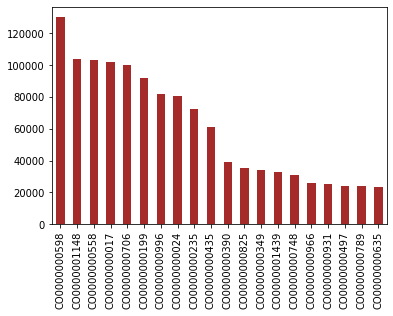

In [ ]:
# Merchant ID

Merchants = bd.merchant_id.value_counts()
r = len(Merchants)
Merchants=100*Merchants/r
#bd[bd['merchant_enabled']=='Inactivo']['site_classification'].value_counts()
#print("No.of.unique values in each column :\n", Merchant_City)
Merchants[0:20].plot(kind='bar', color='brown')


###### What are the most frequent categories

No.of.unique values in each column :
 K-ACTIVIDADES FINANCIERAS Y DE SEGUROS                                                        39.577161
O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA      19.312890
R-ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN                                      7.884385
G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS     7.422635
J-INFORMACIÓN Y COMUNICACIONES                                                                 6.270427
Q-ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL                            5.079903
N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO                                          4.940630
P-EDUCACIÓN                                                                                    3.759050
H-TRANSPORTE Y ALMACENAMIENTO                                                                  2.576668
S-OTRAS ACTIVIDADES DE SER

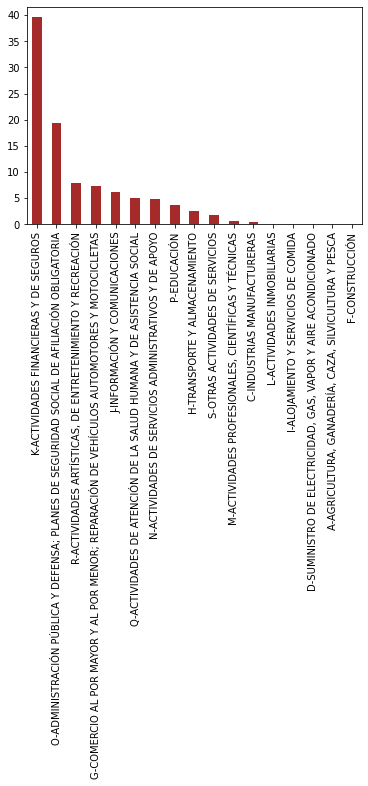

In [ ]:
# Merchant Category (section name)
# transaction that are in a merchant division 
n3 = bd.isic_section_name.value_counts()
n3=100*n3/len(bd)
print("No.of.unique values in each column :\n", n3)
n3.plot(kind='bar', color='brown')

No.of.unique values in each column :
 65-Seguros y fondos de pensiones                                    33.293149
84-Administración pública y defensa                                 19.263265
93-Actividades deportivas                                            7.345465
47-Comercio al por menor                                             6.708319
64-Servicios financieros                                             4.467468
                                                                      ...    
13.0-Fabricación de productos textiles                               0.000020
18.0-Actividades de impresión                                        0.000010
32.0-Otras industrias manufactureras                                 0.000010
42-Obras de ingeniería civil                                         0.000010
35.0-Suministro de electricidad, gas, vapor y aire acondicionado     0.000000
Name: isic_division_name, Length: 76, dtype: float64


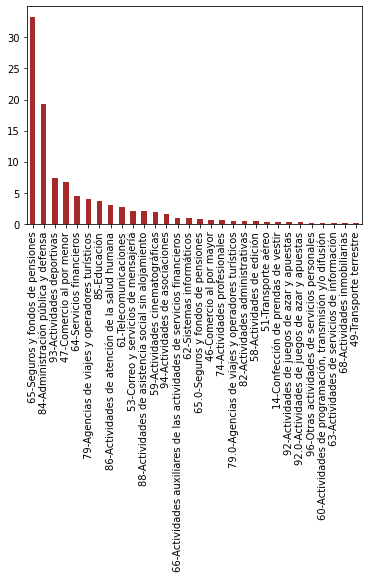

In [ ]:
# Merchant subcategory Division ID
# Transaction that are in a merchant division in Percentage
n = bd.isic_division_name.value_counts()
n=100*n/len(bd)
print("No.of.unique values in each column :\n", n)
n.head(30).plot(kind='bar', color='brown')

###### How Old is the merchant that make the most transactions?

In [ ]:
# How Old is the merchant that make the most transactions?
n4 = bd.merchant_created.value_counts().copy()
n4 = pd.to_datetime(n4, format='%Y%m%d')
n4.sort_index(inplace=True)
#n4.sort_values(by='merchant_created')
# the last merchant created
m = n4.index[-1] #bd.merchant_created.max()
# Day the data was collected:
m = pd.to_datetime('20202009', format='%Y%d%m')
n5 = pd.DataFrame(n4)
#n5.columns = pd.Index(['transactions'])
n5['Antiguedad'] = m-n5.index
n5

merchant_created Antiguedad
2003-06-27            601820  6371 days
2004-02-04             23360  6149 days
2004-04-27             29793  6066 days
2004-07-27            108768  5975 days
2004-12-03            477708  5846 days
...                      ...        ...
2020-09-03               777    93 days
2020-10-09                11    57 days
2020-11-02             21120    33 days
2020-11-06                 5    29 days
2020-12-05                16     0 days

[446 rows x 2 columns]

In [ ]:
n5.describe()

merchant_created                    Antiguedad
count        446.000000                           446
mean       22084.520179  1845 days 08:36:35.515695072
std        87326.875964  1468 days 16:41:53.983204208
min            1.000000               0 days 00:00:00
25%           66.250000             658 days 06:00:00
50%          496.500000            1361 days 00:00:00
75%         5046.500000            2794 days 00:00:00
max       769686.000000            6371 days 00:00:00

##### Transaction distribution by seniority of merchants. 

How much days is old a merchant (seniority) and how many transactions are made to this merchant?

The next plot has the age of the merchant in the y-axis and the number of transactions acumulated to this merchant in the x-axis

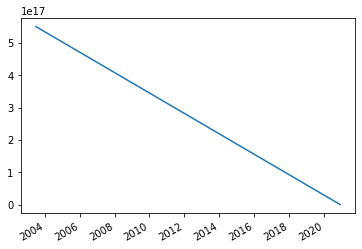

In [ ]:
# Transaction distribution by seniority of merchants. 
# Most of the transactions are made to old and established merchants

n5["Antiguedad"].plot()

##### Where are the merchants based?

No.of.unique values in each column :
 Medellin               44.611214
Bogota                 42.925609
Cali                    6.241736
Barranquilla            1.827904
Sabaneta                0.711961
Bucaramanga             0.491924
Armenia                 0.471791
Villavicencio           0.397789
Pereira                 0.376418
Itagui                  0.363615
Manizales               0.185062
Chia                    0.148857
Facatativa              0.146187
Santa Marta             0.135537
Monteria                0.129801
Sincelejo               0.093719
Rionegro                0.081109
Neiva                   0.075160
Yopal                   0.067840
Yumbo                   0.066002
Cartagena               0.057616
Montenegro              0.055118
Ibague                  0.042915
Envigado                0.041230
La Estrella             0.031564
Cucuta                  0.026275
Soledad                 0.024275
La Calera               0.020437
Pasto                   0.019848
San A

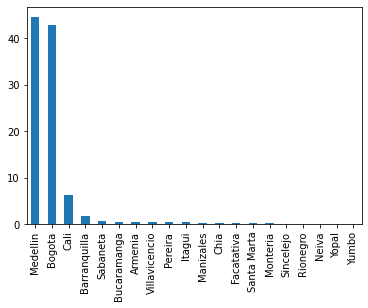

In [ ]:
#bd.merchant_address_city.unique()

# Country / Region / city  where the Merchant is registered.
Merchant_City = bd.merchant_address_city.value_counts()
Merchant_City=100*Merchant_City/len(bd)
print("No.of.unique values in each column :\n", Merchant_City)
Merchant_City.head(20).plot(kind='bar')


# 2- Inspecting variables

In the 2nd and 3rd Notebook, we made a preliminary exploration of  the majority of the columns in the first rows or a sample of the dataset. 

Here we will take a deeper look at the more important variables.

## Barplots

Here we plot more informative barplots of some categorical variables from the updated Database.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


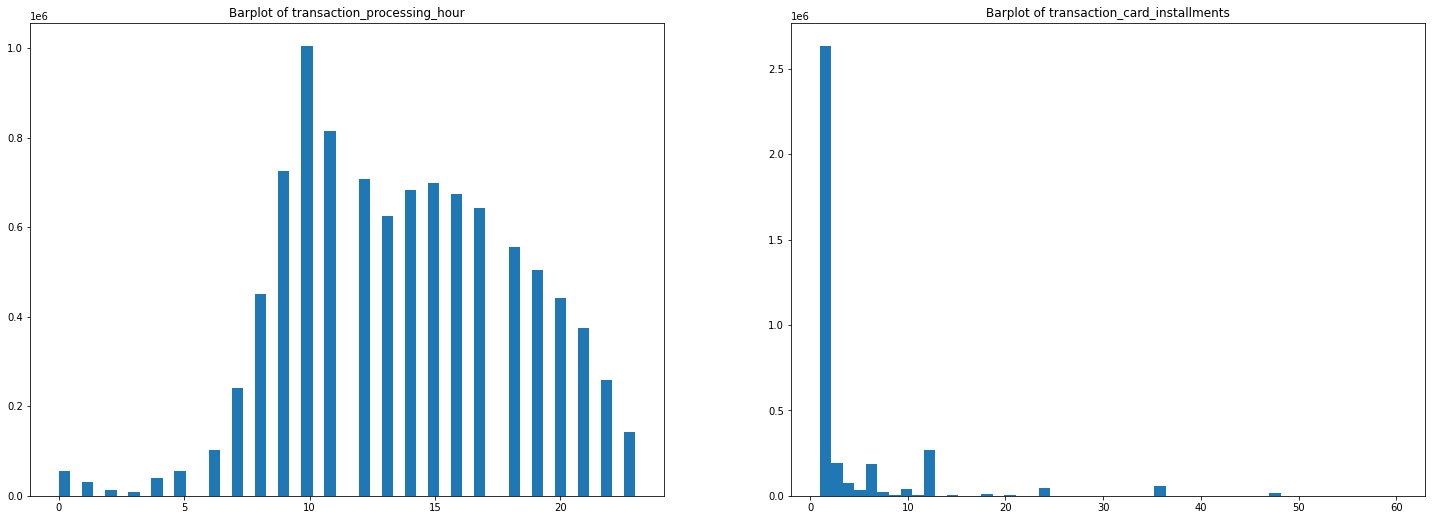

In [ ]:
#Barplots:
plt.figure(figsize=(25,40))
vars_to_plot = ['transaction_processing_hour', 'transaction_card_installments']
for i, var in enumerate(vars_to_plot):
    plt.subplot(4,2,i+1)
    plt.hist(bd[var],50)
    title_string = "Barplot of " + var
    plt.title(title_string)

## Frequency tables for categorical variables

In [ ]:
dh=bd.groupby(['isic_division_name']).count()
dh.head(50)

transaction_user_agent  ...  isic_section_name
isic_division_name                                                          ...                   
13-Fabricación de productos textiles                                  2099  ...               2137
13.0-Fabricación de productos textiles                                   2  ...                  2
14-Confección de prendas de vestir                                     578  ...              29341
15-Fabricación de articulos de cuero                                  1864  ...               1945
15.0-Fabricación de articulos de cuero                                  29  ...                 30
17-Fabricación de papel y cartón                                        28  ...                 28
18-Actividades de impresión                                            818  ...                830
18.0-Actividades de impresión                                            1  ...                  1
2-Silvicultura y extracción de madera                                   14  ...                 14
20-Fabricación de sustancias y productos químicos                     5223  ...               5305
21.0-Fabricación productos farmacéuticos                                 8  ...                  8
22-Fabricación de productos de caucho y de plás...                    2064  ...               2112
22.0-Fabricación de productos de caucho y de pl...                      21  ...                 21
23-Fabricación de otros productos minerales no ...                     234  ...               2325
23.0-Fabricación de otros productos minerales n...                       0  ...                  6
30-Fabricación de otros tipos de equipo de tran...                    1539  ...               1550
30.0-Fabricación de otros tipos de equipo de tr...                      14  ...                 14
31.0-Fabricación de muebles, colchones y somieres                     4803  ...               4929
32-Otras industrias manufactureras                                     103  ...                103
32.0-Otras industrias manufactureras                                     1  ...                  1
35-Suministro de electricidad, gas, vapor y air...                     143  ...                150
35.0-Suministro de electricidad, gas, vapor y a...                       0  ...                  0
42-Obras de ingeniería civil                                             1  ...                  1
43-Actividades especializadas para la construcc...                       2  ...                  2
45-Comercio y reparación de vehículos y partes                        4709  ...               4774
46-Comercio al por mayor                                             63650  ...              65584
47-Comercio al por menor                                             58185  ...             660749
49-Transporte terrestre                                               7063  ...               7581
49.0-Transporte terrestre                                               51  ...                 54
50-Transporte acuático                                                 142  ...                147
51-Transporte aéreo                                                  33757  ...              34595
52.0-Almacenamiento y actividades complementari...                      38  ...                335
53-Correo y servicios de mensajería                                 100782  ...             210029
53.0-Correo y servicios de mensajería                                  373  ...               1053
55-Alojamiento                                                        2857  ...               5832
56-Actividades de servicios de comidas y bebidas                       129  ...                129
58-Actividades de edición                                            33204  ...              41681
58.0-Actividades de edición                                             47  ...                 54
59-Actividades cinematográficas                                     156933  ...             

In [ ]:
bd.groupby(['isic_division_name']).count().sort_values(by='transaction_id',ascending=False).head(50)

transaction_user_agent  ...  isic_section_name
isic_division_name                                                          ...                   
65-Seguros y fondos de pensiones                                   2718430  ...            3279274
84-Administración pública y defensa                                1817156  ...            1897373
93-Actividades deportivas                                           100607  ...             723506
47-Comercio al por menor                                             58185  ...             660749
64-Servicios financieros                                            431249  ...             440032
79-Agencias de viajes y operadores turísticos                        68398  ...             397868
85-Educación                                                        358000  ...             370255
86-Actividades de atención de la salud humana                       250454  ...             298699
61-Telecomunicaciones                                               266323  ...             273311
53-Correo y servicios de mensajería                                 100782  ...             210029
88-Actividades de asistencia social sin alojami...                  198188  ...             200688
59-Actividades cinematográficas                                     156933  ...             185172
94-Actividades de asociaciones                                      146977  ...             155247
66-Actividades auxiliares de las actividades de...                   93349  ...              95101
62-Sistemas informáticos                                             48908  ...              93780
65.0-Seguros y fondos de pensiones                                   73947  ...              76478
46-Comercio al por mayor                                             63650  ...              65584
74-Actividades profesionales                                         63875  ...              65517
79.0-Agencias de viajes y operadores turísticos                      11448  ...              46390
82-Actividades administrativas                                       41730  ...              42379
58-Actividades de edición                                            33204  ...              41681
51-Transporte aéreo                                                  33757  ...              34595
14-Confección de prendas de vestir                                     578  ...              29341
92-Actividades de juegos de azar y apuestas                          25749  ...              26100
92.0-Actividades de juegos de azar y apuestas                        24900  ...              25166
96-Otras actividades de servicios personales                         12315  ...              19125
60-Actividades de programación, transmisión y/o...                    1036  ...              12105
63-Actividades de servicios de información                            9138  ...               9814
68-Actividades inmobiliarias                                          5578  ...               8160
49-Transporte terrestre                                               7063  ...               7581
64.0-Servicios financieros                                            7313  ...               7345
70.0-Actividades de administración empresarial                        6459  ...               6790
55-Alojamiento                                                        2857  ...               5832
20-Fabricación de sustancias y productos químicos                     5223  ...               5305
31.0-Fabricación de muebles, colchones y somieres                     4803  ...               4929
84.0-Administración pública y defensa                                 4132  ...               4888
45-Comercio y reparación de vehículos y partes                        4709  ...               4774
23-Fabricación de otros productos minerales no ...                     234  ...               2325
13-Fabricación de productos textiles                                  2099  ...             

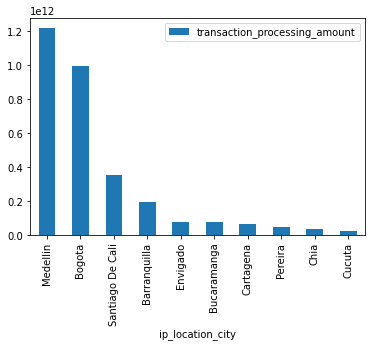

In [ ]:
#Amount of transactions by location:

d2=bd[['transaction_processing_amount', 'ip_location_city']].groupby(['ip_location_city']).sum().sort_values(by='transaction_processing_amount', ascending = False)
d2.head(10).plot(kind = 'bar')

In [ ]:
d3=bd.groupby(['transaction_card_issuer_name']).count().sort_values(by='transaction_id',ascending=False)
d3.head(50)

transaction_user_agent  ...  isic_section_name
transaction_card_issuer_name                                  ...                   
Bancolombia                                          4111721  ...            4947255
Banco Davivienda                                      936777  ...            1285594
Banco De Bogota                                       357622  ...             499790
Banco Bbva Colombia S.A.                              356851  ...             375243
Codensa Colpatria                                       2270  ...             315191
Bbva                                                   71781  ...             235053
Citibank                                               89112  ...             203665
Scotiabank Colpatria                                  183754  ...             194364
Banco Colpatria                                        76173  ...             185030
Banco Caja Social                                     151591  ...             160273
Falabella                                              67792  ...             151736
Banco Av Villas                                       125282  ...             144797
Banco De Occidente                                     84959  ...             136300
Nequi                                                 114157  ...             123933
Banco Itau                                             69779  ...              73499
Itaú                                                   25320  ...              67903
Compania De Financiamiento Tuya                        35274  ...              55365
Banco Popular                                          36773  ...              48048
Daviplata                                              42159  ...              45502
Banco Bogota                                           18357  ...              45218
Av Villas                                              18440  ...              43124
Bbva Colombia S.A                                      15408  ...              40890
Bcsc                                                    9410  ...              25083
Banco Falabella                                        22663  ...              24144
Banco Occidente                                        10125  ...              23933
Gana                                                   22372  ...              22620
Bancoomeva S.A.                                        21485  ...              22254
Banco Agrario                                          19025  ...              20165
Banco Colpatria Pricesmart                              9278  ...              20019
Ripley Visa                                             4017  ...              16532
Movii                                                   4955  ...              15545
Compañía De Financiamiento Tuya S.A.                   11652  ...              13912
Banco Santander                                         4897  ...              13830
Serfinansa                                              6162  ...              12248
Banco Cooperativo Coopcentral                          11420  ...              12012
Banco Gnb Sudameris                                    10656  ...              11413
Caja Social Bcs                                         4512  ...              10418
Finandina                                               5303  ...              10074
Financiera Coomeva                                      2986  ...               8529
Bancoomeva                                              2887  ...               7378
Chase Bank Usa, N.A.                                    3643  ...               6235
Visa                                                    2903  ...               5934
American Express Company                                3013  ...               5547
Bank Of America                                         2716  ...               5139
Wells Fargo Bank, N.A.                                  2366  ...               4898
Capital One Bank (Usa), N.A.               

In [ ]:
d4=bd.groupby(['transaction_card_type']).count()[['transaction_processing_amount','transaction_card_issuer_name', 
                                        'paymentmethod_franchise',  'paymentmethod_name', 'paymentmethod_type',
                                        'card_class', 'card_country', 'transaction_response_code'
                                        ]]
d4.head(50)

transaction_processing_amount  ...  transaction_response_code
transaction_card_type                                 ...                           
A                                               1289  ...                       1289
C                                            3618803  ...                    3618803
D                                            6229572  ...                    6229572
R                                                 32  ...                         32

[4 rows x 8 columns]

In [ ]:
d4=bd.groupby(['transaction_card_type']).count().sort_values(by='transaction_id',ascending=False)
d4.head(50)

transaction_user_agent  ...  isic_section_name
transaction_card_type                          ...                   
D                                     5926650  ...            6229540
C                                     1344552  ...            3618618
A                                        1230  ...               1289
R                                          15  ...                 32

[4 rows x 31 columns]

In [ ]:
d5=bd.groupby(['transaction_payer_id']).count().sort_values(by='transaction_id',ascending=False)
d5.head(50)

transaction_user_agent  ...  isic_section_name
transaction_payer_id                          ...                   
KZ7VZ431                                  48  ...                 50
JMX_S9^A                                  50  ...                 50
HQ$6(Z&[                                  43  ...                 50
E<@5\SV:                                   0  ...                 50
HQ#E83Y9                                  50  ...                 50
O336VO1K                                   1  ...                 50
D-3`]5_=                                   1  ...                 50
K1^+=I>D                                   0  ...                 50
P[ZF0EGI                                  19  ...                 50
EAG&#+3'                                  50  ...                 50
L,91P;/%                                   0  ...                 50
G_CR.%5A                                  50  ...                 50
K>,$#U7.                                  49  ...                 50
BW$!<TM9                                  50  ...                 50
P6SUV"U&                                  48  ...                 50
NF?\\]9H                                   0  ...                 50
K>/-6<OL                                  11  ...                 50
C:=A6S/9                                  50  ...                 50
A_IF`P^C                                   2  ...                 50
JCDJ!EL)                                   4  ...                 50
ME(3%#O9                                  49  ...                 50
LI1Z`XE2                                   1  ...                 50
MYZ,9(H;                                  28  ...                 50
JG=M?TV1                                   0  ...                 50
BG4E5)%W                                   2  ...                 50
J=:MJ809                                  50  ...                 50
B^,C>O2Q                                   0  ...                 50
G.5!F!VE                                  50  ...                 50
CS="(O^\                                  50  ...                 50
H'R0!"&*                                  48  ...                 50
HV5,CB67                                  15  ...                 50
K^6O5^YX                                   0  ...                 50
ALK>>S9%                                   0  ...                 50
J=%C#_N4                                  24  ...                 50
OO,.M)TA                                  49  ...                 50
HH.MW`LR                                   6  ...                 50
LPC&1!=7                                   1  ...                 50
LD"D5%X\                                   0  ...                 50
H><,9$R;                                   1  ...                 50
C8NC*1Z5                                  32  ...                 50
GZ#(_,`[                                  47  ...                 50
M/*]P9$W                                   0  ...                 50
EHG@S5AV                                   0  ...                 50
F)#C6.NM                                  48  ...                 50
N.%TL_,2                                  10  ...                 50
G6#WF--L                                   1  ...                 50
K7:35=6Y                                  45  ...                 50
E5=%6NX.                                  49  ...                 50
G66"M]]O                                  49  ...                 50
D6&YEY?+                                  11  ...                 50

[50 rows x 31 columns]

In [ ]:
d6=bd.groupby(['transaction_card_installments']).count()
d6.head(50)

transaction_user_agent  ...  isic_section_name
transaction_card_installments                          ...                   
1.0                                            829819  ...            2380834
2.0                                             93016  ...             255156
3.0                                             65926  ...             193354
4.0                                             47327  ...              72488
5.0                                             24634  ...              36137
6.0                                             59225  ...             185697
7.0                                              5300  ...               6836
8.0                                             10246  ...              13495
9.0                                              2187  ...               3810
10.0                                            33318  ...              42602
11.0                                             2049  ...               2359
12.0                                            92305  ...             268375
13.0                                              654  ...                774
14.0                                              903  ...               1115
15.0                                             2046  ...               2774
16.0                                              792  ...               1053
17.0                                              220  ...                279
18.0                                             4078  ...              11363
19.0                                              274  ...                332
20.0                                             2572  ...               3464
21.0                                              158  ...                207
22.0                                              171  ...                253
23.0                                               73  ...                102
24.0                                            15300  ...              44015
25.0                                              186  ...                244
26.0                                              138  ...                177
27.0                                               54  ...                 94
28.0                                              100  ...                152
29.0                                               46  ...                 60
30.0                                              837  ...               1087
31.0                                               32  ...                 46
32.0                                              156  ...                216
33.0                                               79  ...                113
34.0                                              109  ...                146
35.0                                              198  ...                236
36.0                                            39586  ...              59373
39.0                                                0  ...                  1
48.0                                                0  ...              17181
50.0                                                0  ...                  1
60.0                                                0  ...                  4

[40 rows x 31 columns]

In [ ]:
d9=bd.groupby(['transaction_processing_amount']).count()
d9.head(100)

transaction_user_agent  ...  isic_section_name
transaction_processing_amount                          ...                   
0.00                                              261  ...                358
0.01                                                3  ...                  5
0.10                                                1  ...                  3
0.20                                                1  ...                  1
0.22                                                0  ...                  5
...                                               ...  ...                ...
50.40                                               3  ...                  3
51.00                                               4  ...                 16
52.00                                               3  ...                 11
53.00                                               0  ...                  8
54.00                                               2  ...                  7

[100 rows x 31 columns]

In [ ]:
d12=df.groupby(['isic_division_name']).count().sort_values(by='transaction_id',ascending=False)
d12.head(100)

NameError: ignored

## Crosstabs

In [ ]:
pd.crosstab(bd['transaction_card_installments'], bd['isic_division_name'])

In [ ]:
pd.crosstab(bd['isic_division_name'], bd['transaction_processing_hour'])

In [ ]:
pd.crosstab(bd['ip_location_city'], bd['transaction_processing_hour'])
hide_toggle()

In [ ]:
pd.crosstab(bd['ip_location_region_name'], bd['transaction_processing_hour'])

In [ ]:
pd.crosstab(bd['ip_location_country'], bd['transaction_processing_hour'])

## Boxplot of transaction amounts

For the EDA, We first started to look at the ammount of the transactions in relation to the type of business.

This is the boxplot of the value of transaction, by the business classification of the merchant, for the entire number of transactions.

[Text(0, 0, 'A-AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA'),
 Text(0, 0, 'C-INDUSTRIAS MANUFACTURERAS'),
 Text(0, 0, 'D-SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO'),
 Text(0, 0, 'F-CONSTRUCCIÓN'),
 Text(0, 0, 'G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS'),
 Text(0, 0, 'H-TRANSPORTE Y ALMACENAMIENTO'),
 Text(0, 0, 'I-ALOJAMIENTO Y SERVICIOS DE COMIDA'),
 Text(0, 0, 'J-INFORMACIÓN Y COMUNICACIONES'),
 Text(0, 0, 'K-ACTIVIDADES FINANCIERAS Y DE SEGUROS'),
 Text(0, 0, 'L-ACTIVIDADES INMOBILIARIAS'),
 Text(0, 0, 'M-ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS'),
 Text(0, 0, 'N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO'),
 Text(0, 0, 'O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA'),
 Text(0, 0, 'P-EDUCACIÓN'),
 Text(0, 0, 'Q-ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL'),
 Text(0, 0, 'R-ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN')

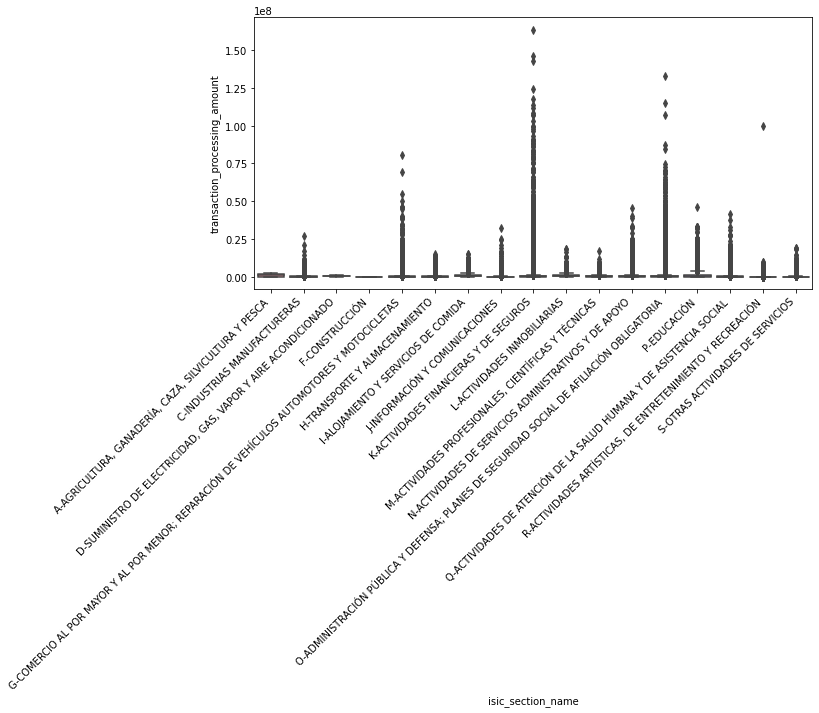

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

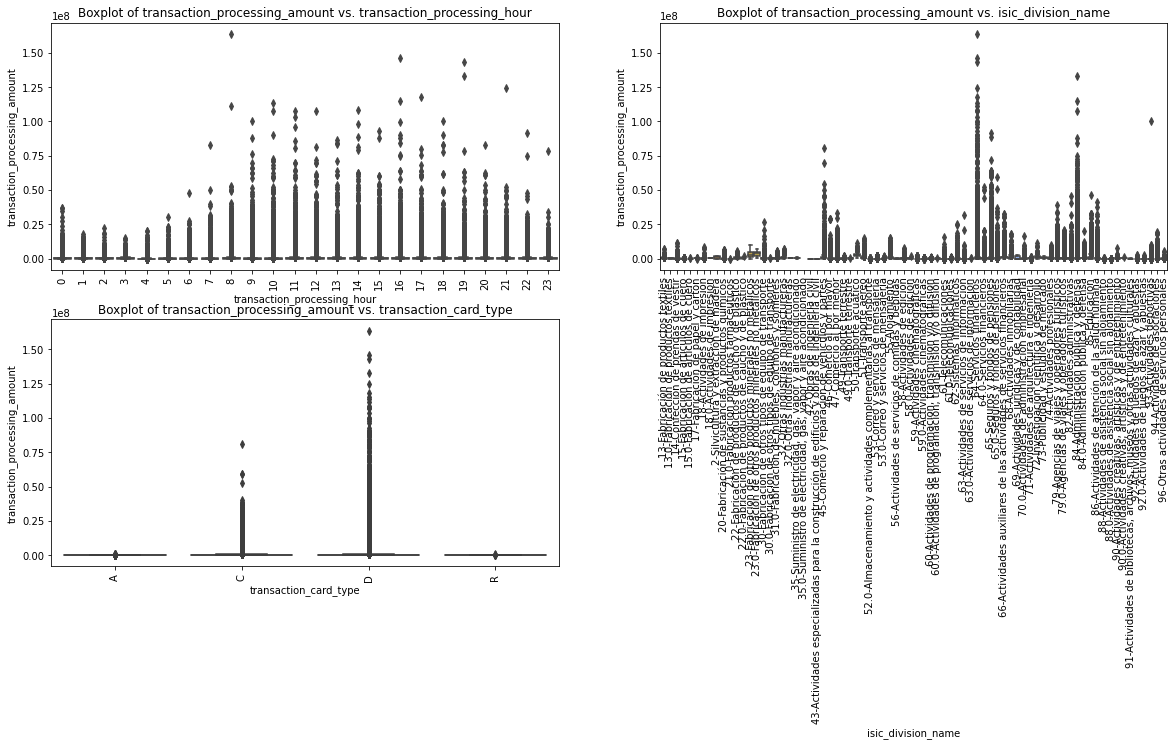

In [ ]:
# Boxplots
plt.figure(figsize=(20,10))
vars_to_plot = ['transaction_processing_hour','isic_division_name','transaction_card_type']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='transaction_processing_amount', data = bd)
    title_string = "Boxplot of transaction_processing_amount vs. " + var
    plt.xticks(rotation = 90)
    plt.ylabel("transaction_processing_amount")
    plt.title(title_string)

## transaction_amount buckets

Here we found that there were values extremely high and others that were extremely low. We assume that there cannot be a transaction of the same type or business type with such variability in prices. (as for example having a transaction for buying a lunch for $1000 and another for 10,000,000) So we decided to investigate this behavior segmenting the transactions by transaction ammount. 

We decided to make 7 buckets: 

* Bucket 1: \$0 to \$1000
* Bucket 2: \$1000 to \$10 000
* Bucket 3: \$10 000 to \$100 000
* Bucket 4: \$100 000 to \$1000 000
* Bucket 5: \$1000 000 to \$10 000 000
* Bucket 6: \$10 000 000 to \$100 000 000
* Bucket 7: More than \$100 000 000

This buckets were selected a-priori. We still dont know if they are a good choice, because this categorization can incluence heavily the plots. It is possible that after a serious consideration we find that there are transactions near the upper limit of a bucket that are more similar with transactions in the lower limit of the next bucket than with the actual bucket. 

In this step what we do is analize the transactions segmented by ammount of transaction. 



In [ ]:
bd_bounded_1000 = bd[bd["transaction_processing_amount"]<1000]
#print(bd_bounded_1000.head())
bd_bounded_10000 = bd[(bd["transaction_processing_amount"]>=1000) & (bd["transaction_processing_amount"]<10000)]
#print(bd_bounded_10000.head())
bd_bounded_100000 = bd[(bd["transaction_processing_amount"]>=10000) & (bd["transaction_processing_amount"]<100000)]
#print(bd_bounded_100000.head())
bd_bounded_1000000 = bd[(bd["transaction_processing_amount"]>=100000) & (bd["transaction_processing_amount"]<1000000)]
#print(bd_bounded_1000000.head())
bd_bounded_10000000 = bd[(bd["transaction_processing_amount"]>=1000000) & (bd["transaction_processing_amount"]<10000000)]
#print(bd_bounded_10000000.head())
bd_bounded_100000000 = bd[(bd["transaction_processing_amount"]>=10000000) & (bd["transaction_processing_amount"]<100000000)]
#print(bd_bounded_100000000.head())
bd_bounded_greater = bd[bd["transaction_processing_amount"]>100000000]
#print(bd_bounded_greater.head())

Now we make an histogram of the segments. 
This is Transactions segmented by processing ammounts. In this case, we are looking at the transactions with value < $1000.

Then we made a bar plot of number of transactions, classified by business classification of the Merchant ('isic_section_name'), and segmented by the status of the transaction ('transaction_respose_code'). This way we can see visually if there is any correlation between the ammount of the transaction and the type of business.

#### Bucket 1: < $1000

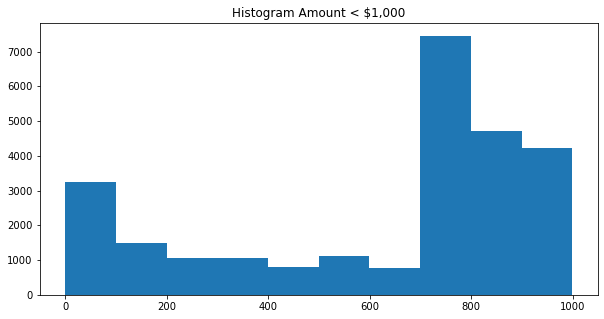

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have value < $1000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_1000["transaction_processing_amount"])
plt.title("Histogram Amount < $1,000")
hide_toggle()

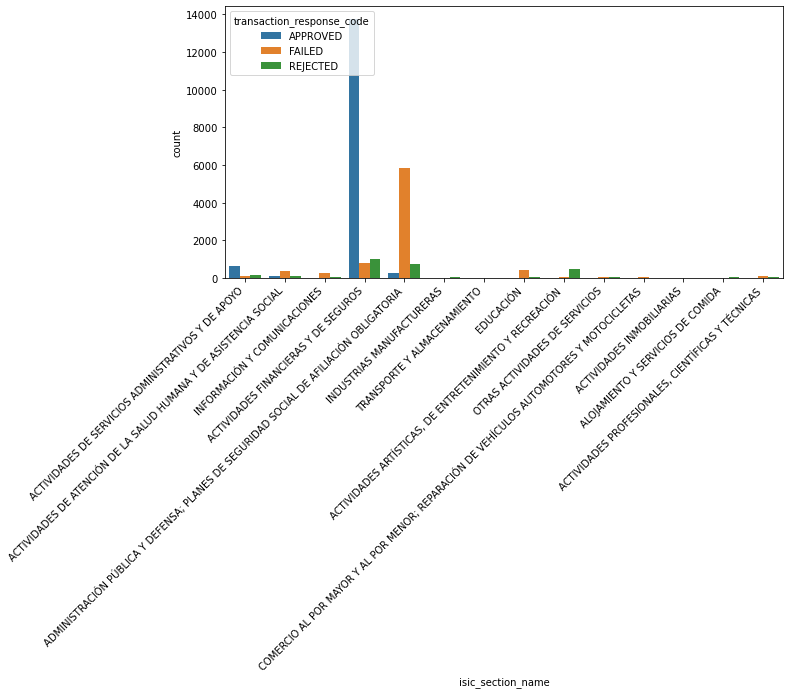

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $1000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_1000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.xticks(rotation=90)
plt.show()
plt.show()

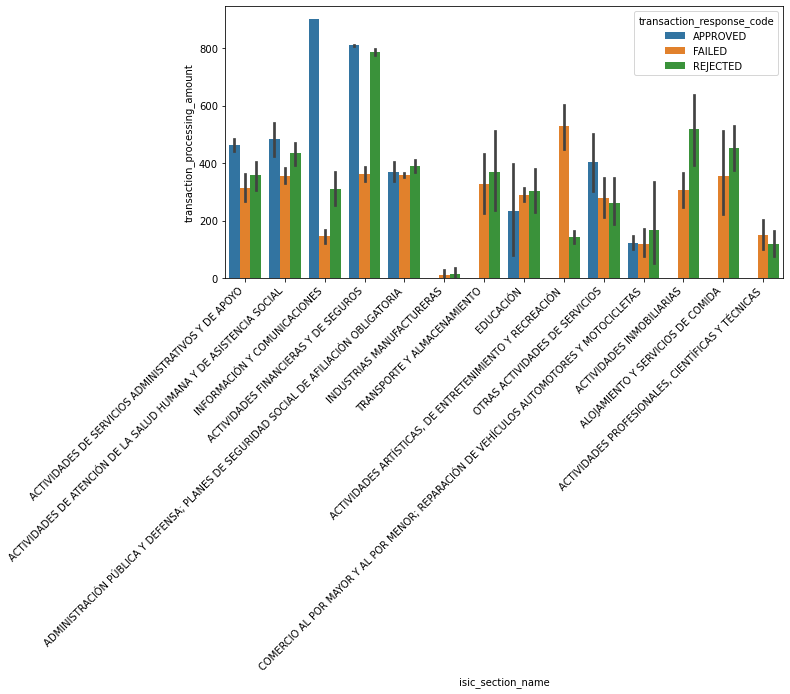

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $1000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_1000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $1,000 by Section')

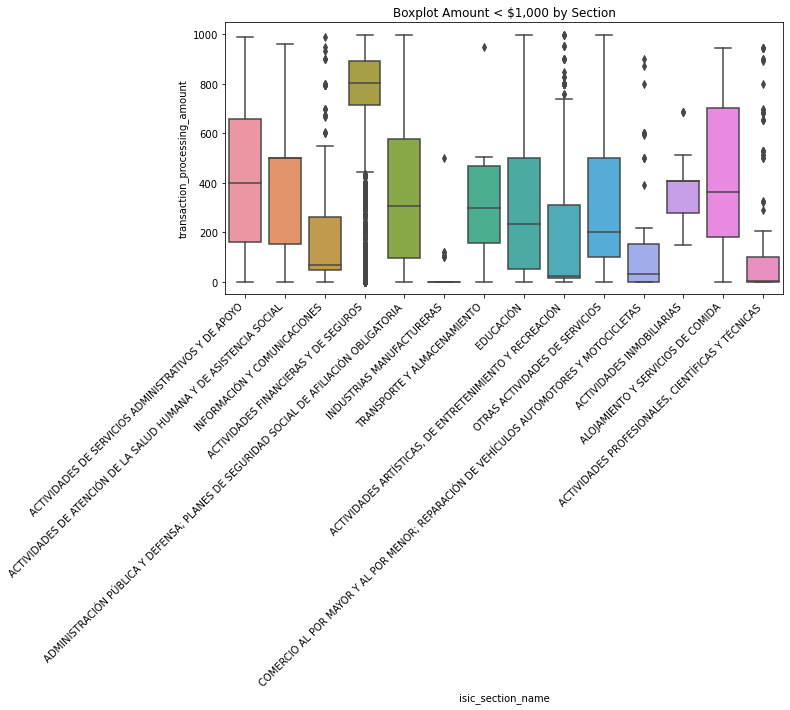

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $1000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_1000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $1,000 by Section")

#### Bucket 2:  \$1,000 < $10,000

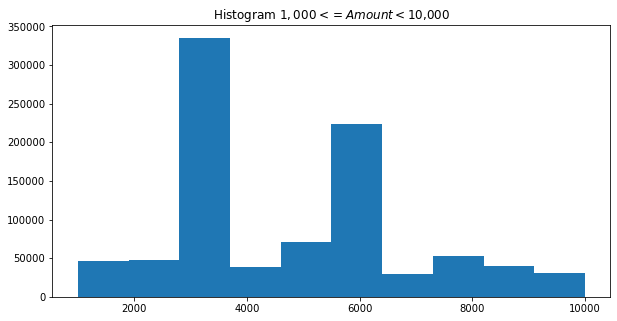

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have value < $10 000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_10000["transaction_processing_amount"])
plt.title("Histogram $1,000 <= Amount < $10,000")
hide_toggle()

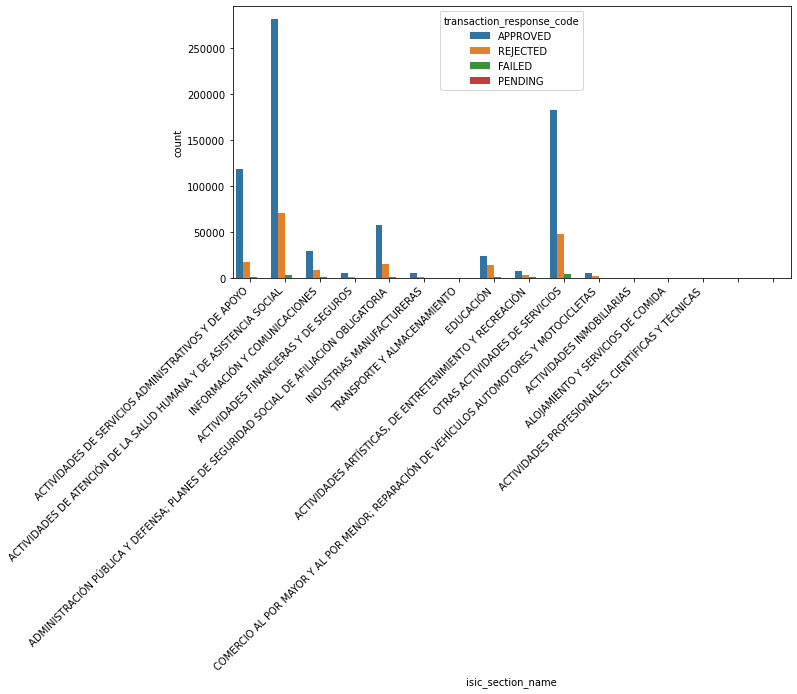

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $10 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_10000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

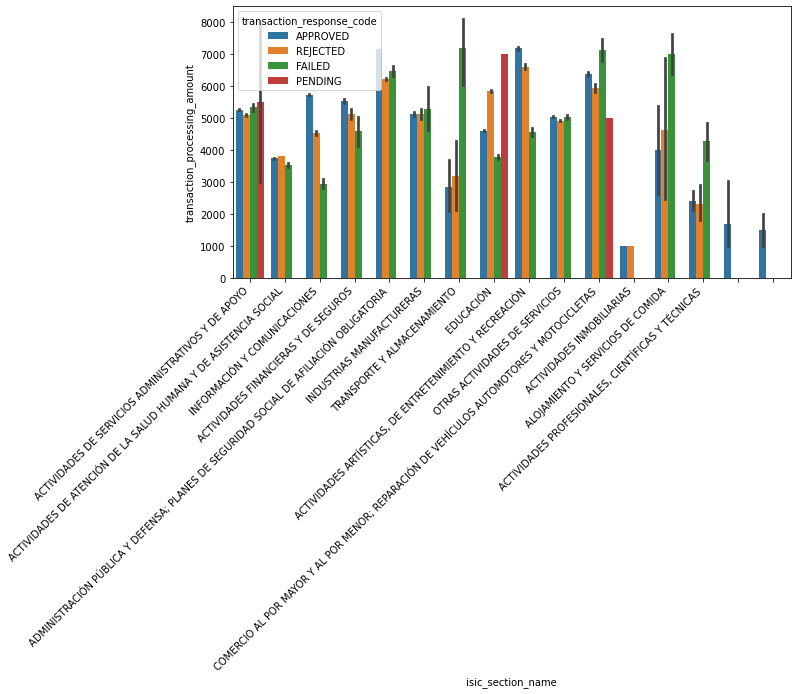

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $10 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_10000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $10,000 by Section')

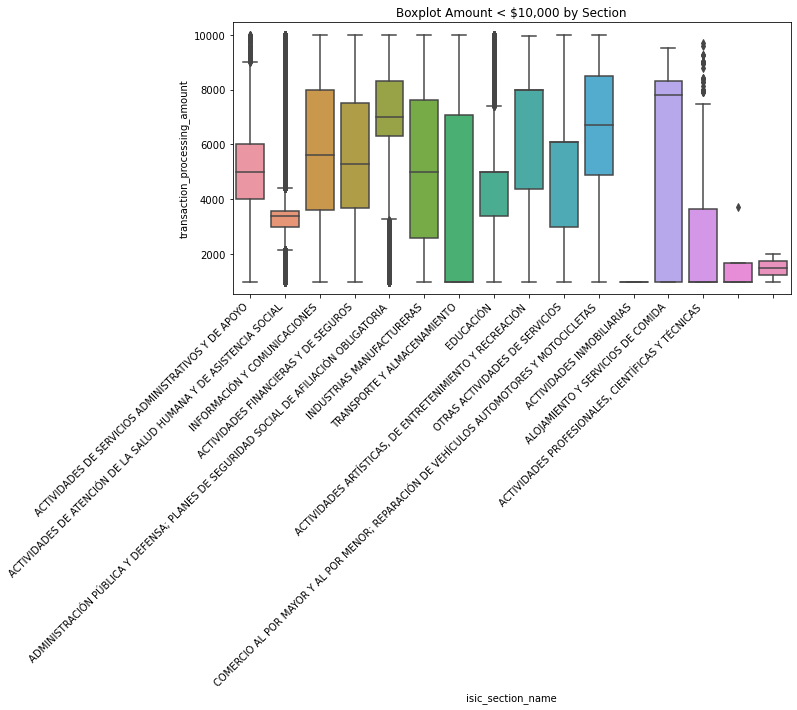

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $10 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_10000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $10,000 by Section")

#### Bucket 3:  \$10,000 < \$100,000

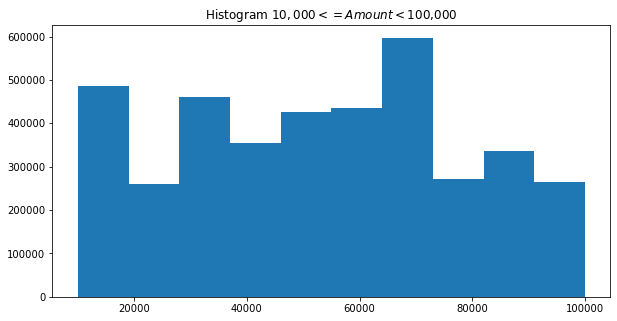

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have value < $100 00
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_100000["transaction_processing_amount"])
plt.title("Histogram $10,000 <= Amount < $100,000")
hide_toggle()

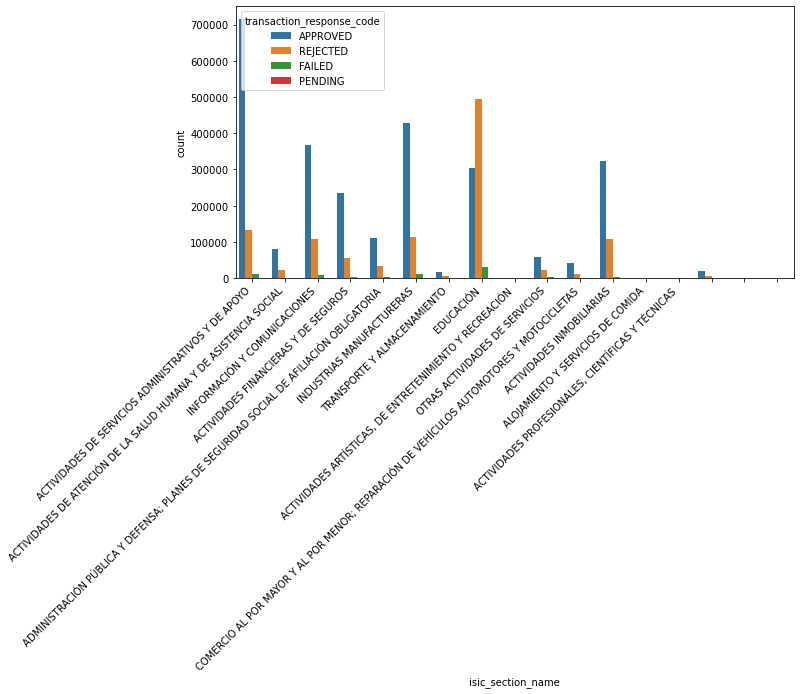

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $100 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_100000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

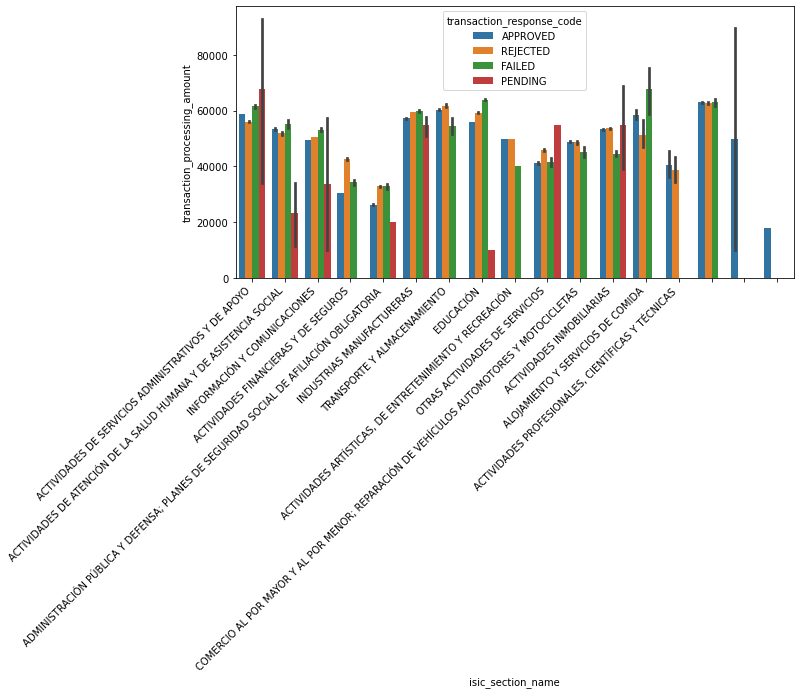

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $100 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_100000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $100,000 by Section')

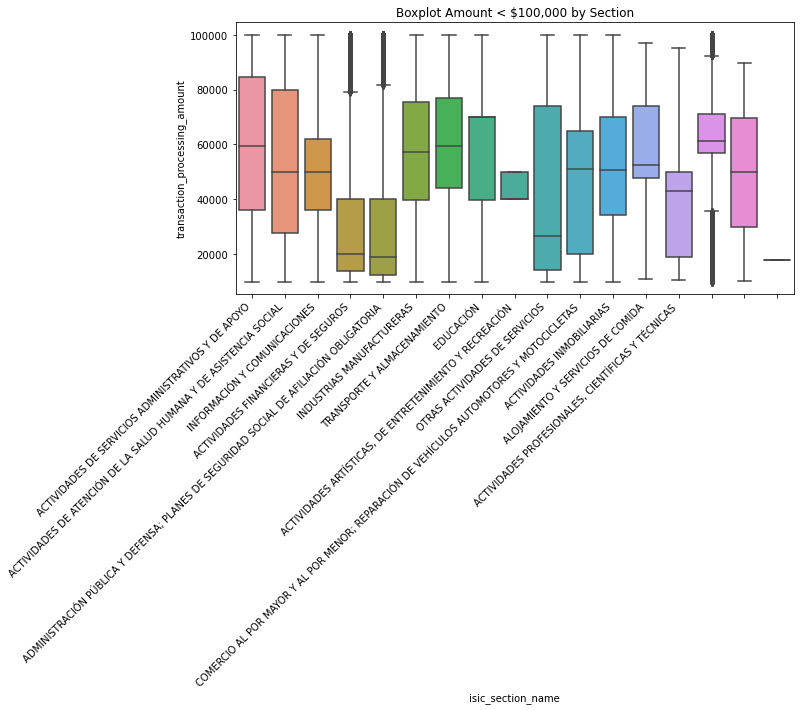

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $100 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_100000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $100,000 by Section")

#### Bucket  4:  \$100,000 < \$1,000,000

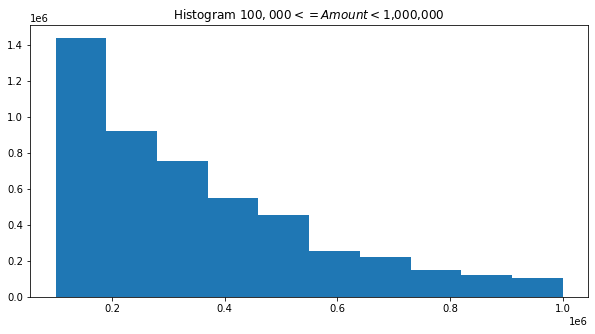

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have value < $1000 000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_1000000["transaction_processing_amount"])
plt.title("Histogram $100,000 <= Amount < $1,000,000")
hide_toggle()

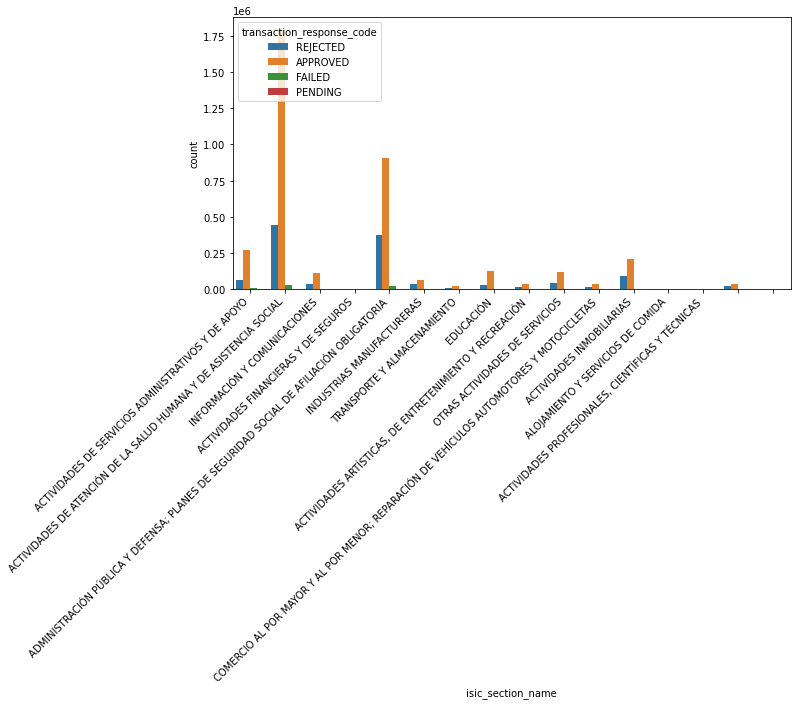

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $1000 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_1000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

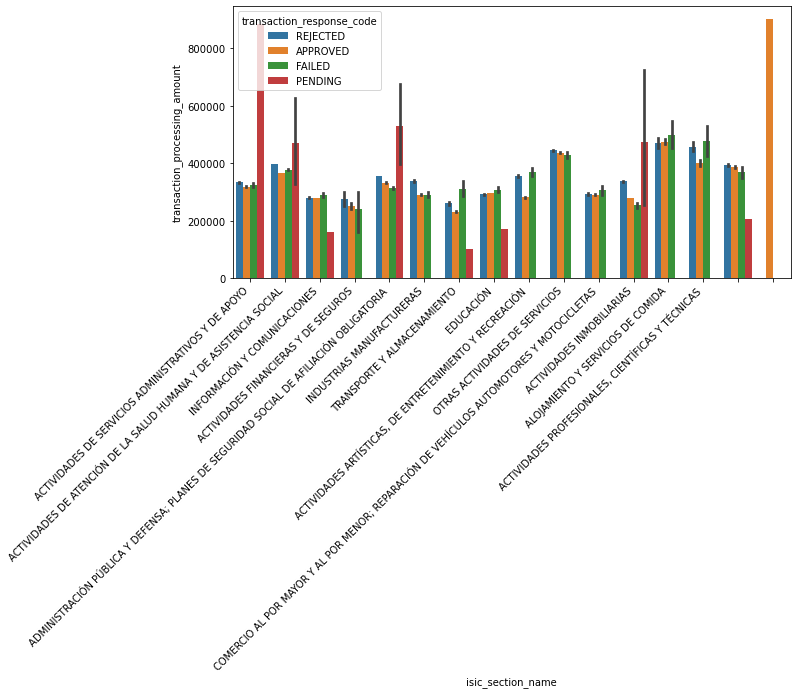

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $1000 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_1000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $1,000,000 by Section')

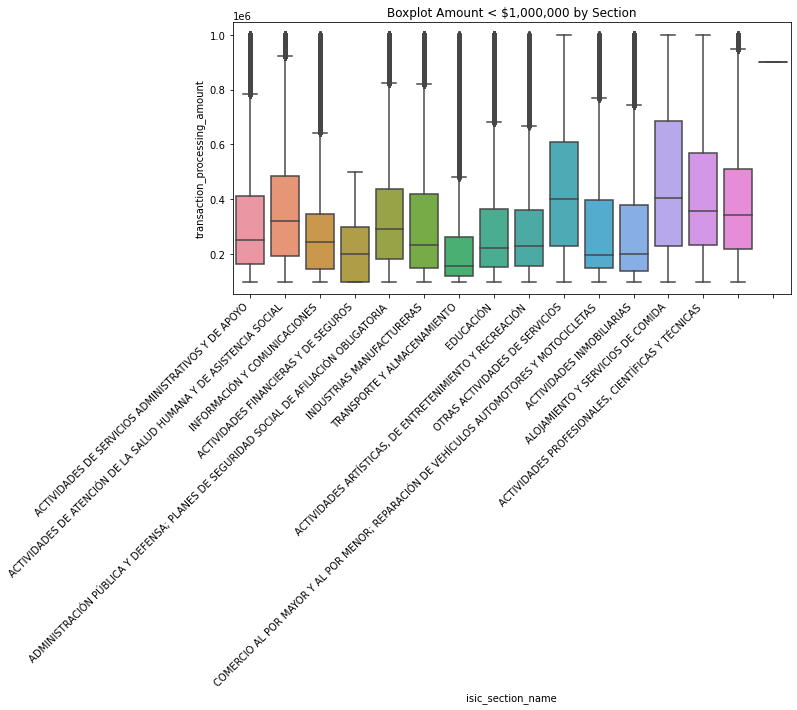

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $1000 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_1000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $1,000,000 by Section")

#### Bucket  5:  \$1,000,000 < \$10,000,000

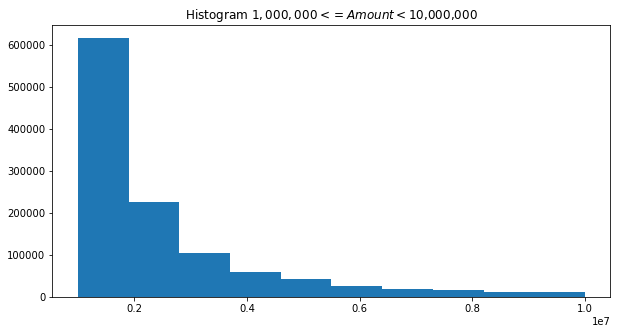

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have valeu < $10 000 000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_10000000["transaction_processing_amount"])
plt.title("Histogram $1,000,000 <= Amount < $10,000,000")
hide_toggle()

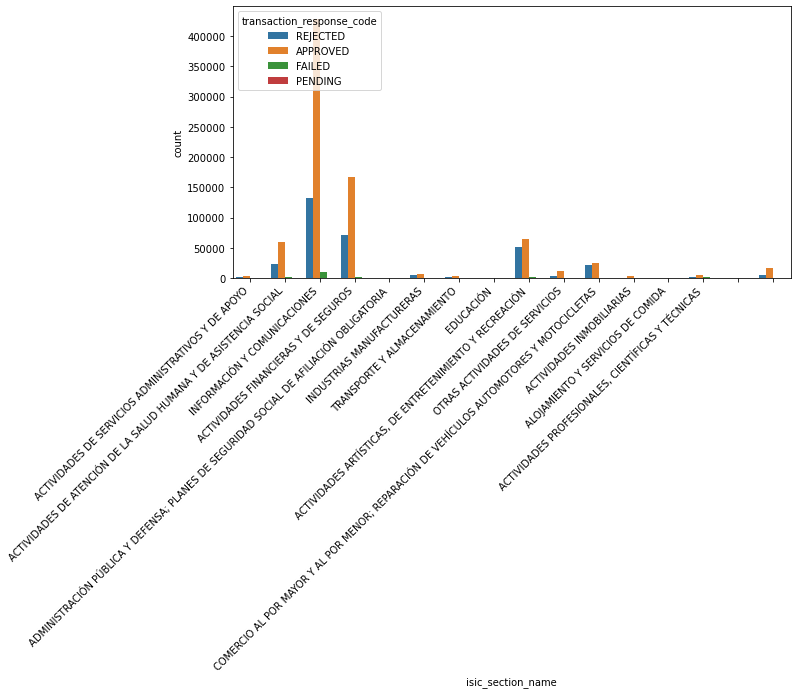

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $10 000 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_10000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

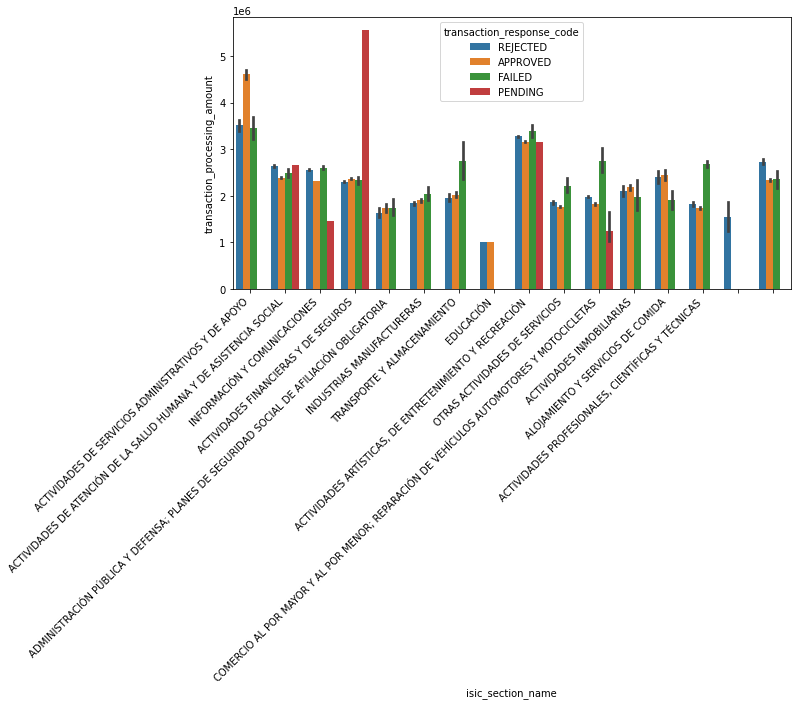

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $10 000 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_10000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $10,000,000 by Section')

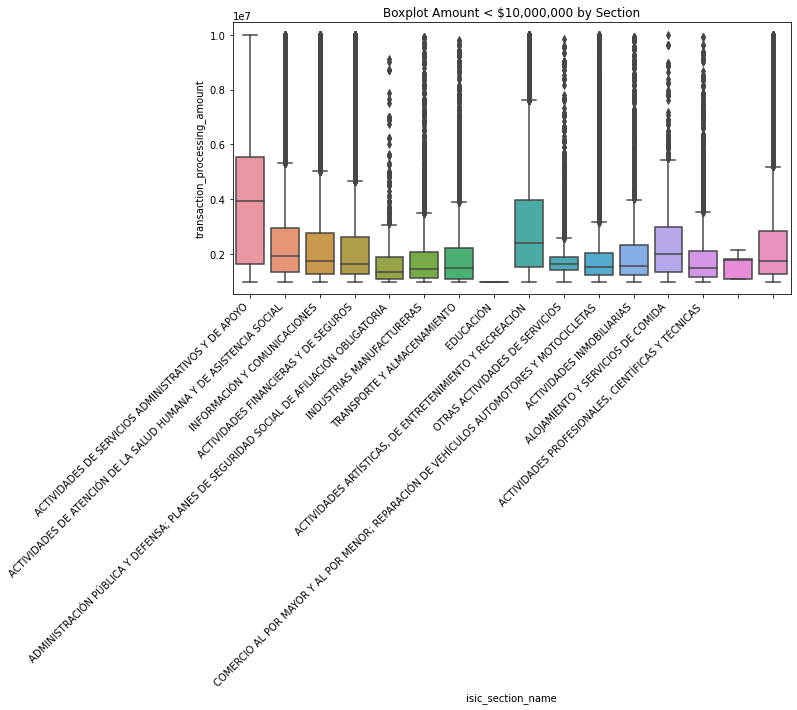

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $10 000 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_10000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $10,000,000 by Section")

#### Bucket  6:  \$10,000,000 < \$100,000,000

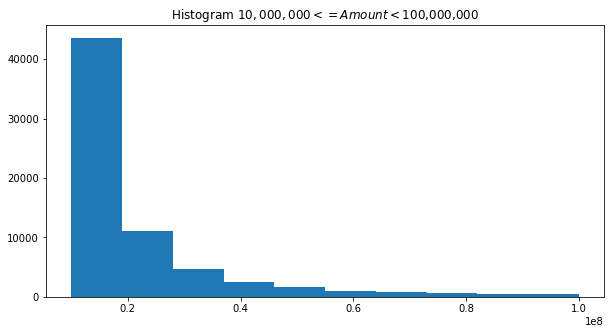

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have valeu < $100 000 000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_100000000["transaction_processing_amount"])
plt.title("Histogram $10,000,000 <= Amount < $100,000,000")
hide_toggle()

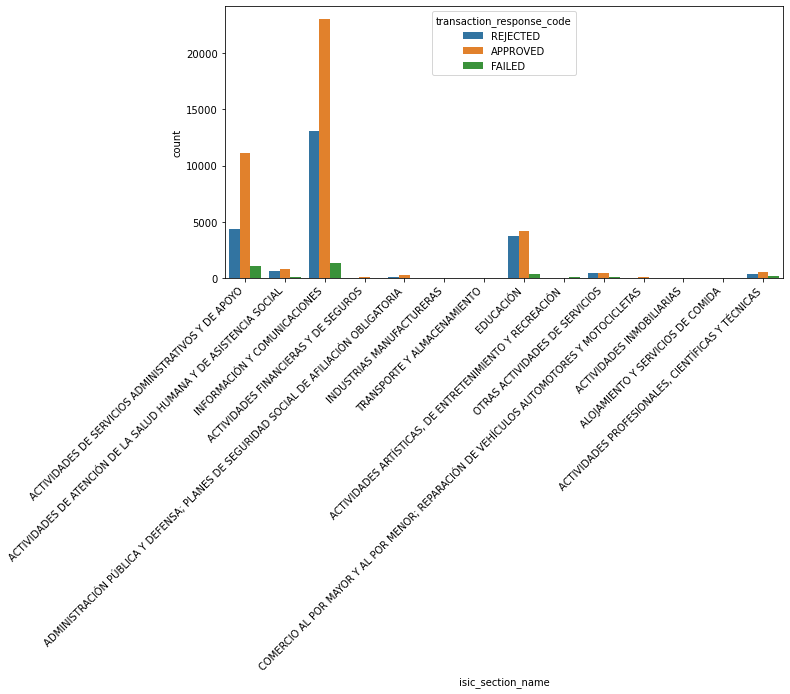

In [ ]:
# Number of transactions by business classification, for transactions with ammount < $100 000 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_100000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

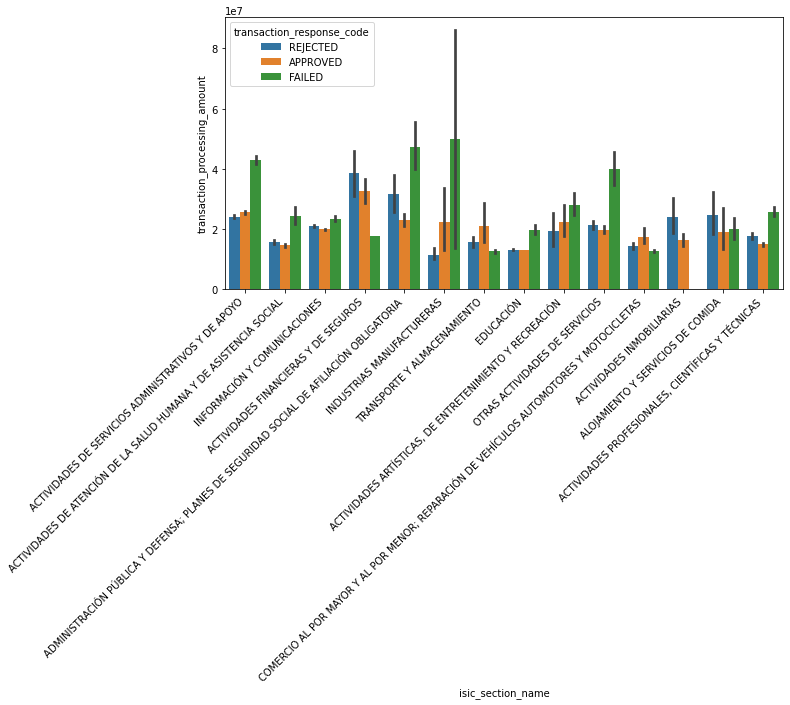

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount < $100 000 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',data=bd_bounded_100000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount < $100,000,000 by Section')

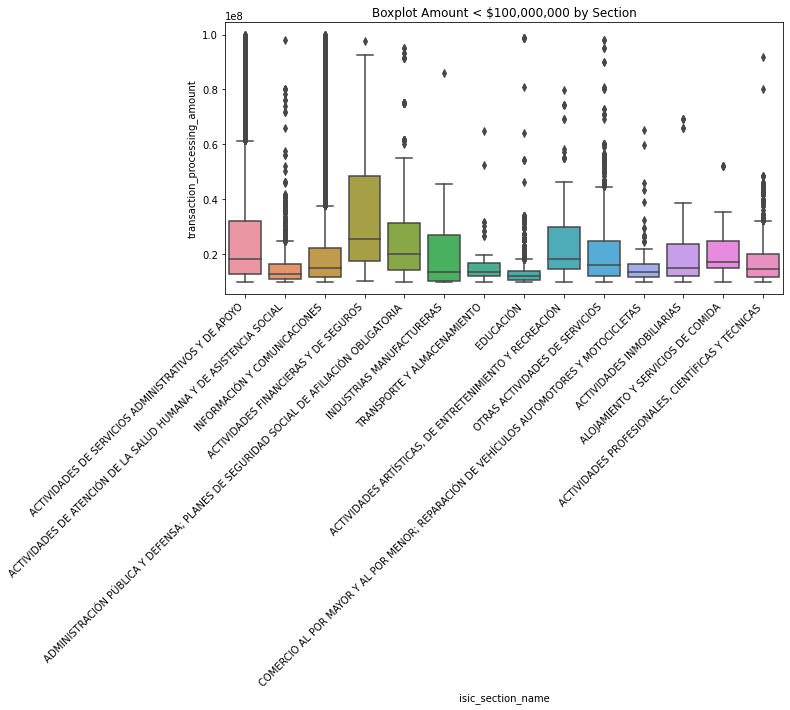

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value < $100 000 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_100000000).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Boxplot Amount < $100,000,000 by Section")

#### Bucket  7:  > $100,000,000

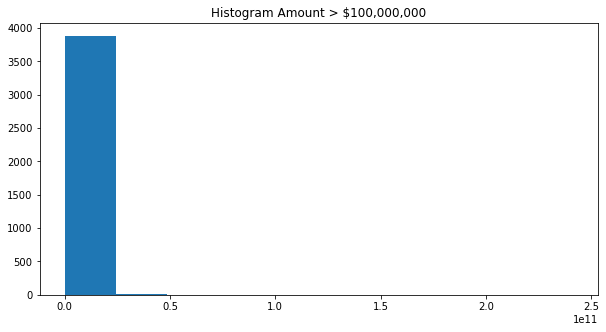

In [ ]:
# Histogram of quantity of transactions by value of transactions. All transactions in this plot have valeu < $100 000 000
plt.figure(figsize=(10,5))
plt.hist(bd_bounded_greater["transaction_processing_amount"])
plt.title("Histogram Amount > $100,000,000")
hide_toggle()

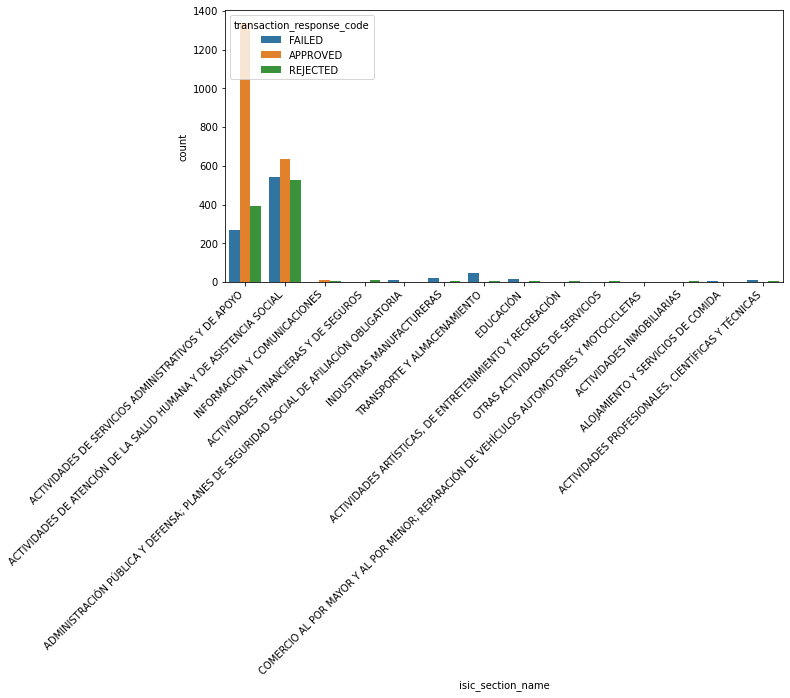

In [ ]:
# Number of transactions by business classification, for transactions with ammount > $100 000 000
plt.figure(figsize=(10, 5))
sns.countplot('isic_section_name',hue='transaction_response_code',data=bd_bounded_greater).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

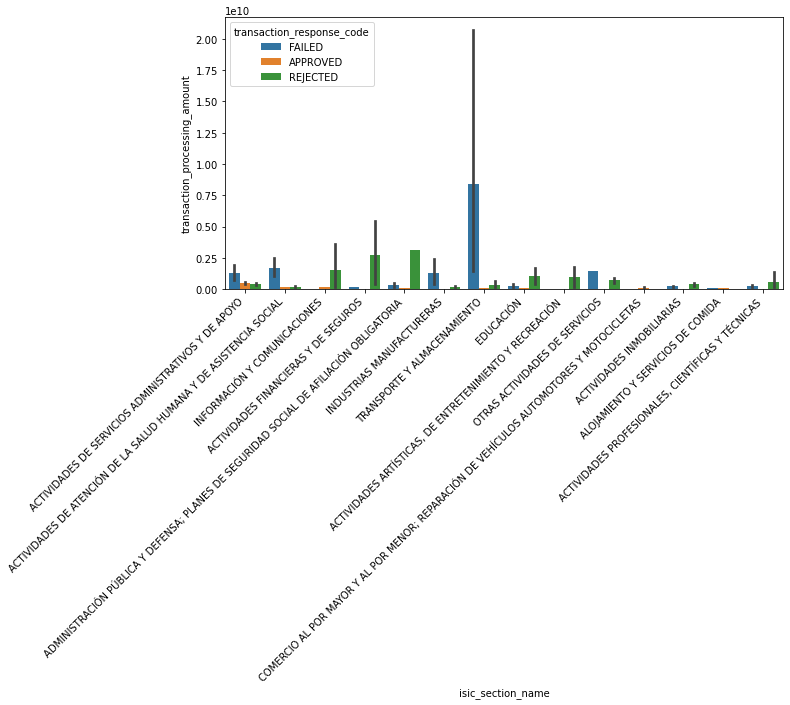

In [ ]:
# This is a BarPlot of the ammount of transactions for transactions with ammount > $100 000 000
plt.figure(figsize=(10, 5))
sns.barplot(y='transaction_processing_amount',x='isic_section_name',hue='transaction_response_code',
            data=bd_bounded_greater).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 1.0, 'Boxplot Amount > $100,000,000 by Section')

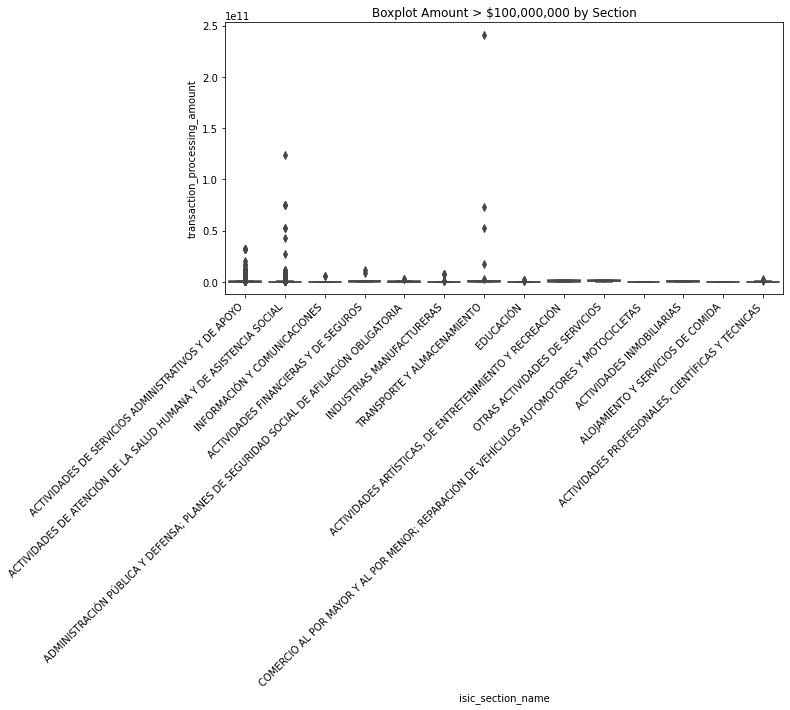

In [ ]:
# Boxplot of transaction ammounts by business classification for transactions with value > $100 000 000
plt.figure(figsize=(10,5))
sns.boxplot(x="isic_section_name",y="transaction_processing_amount", data=bd_bounded_greater).set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.xticks(rotation=90)
plt.title("Boxplot Amount > $100,000,000 by Section")

# 3- Overview using Pandas Profiling

Finally, using the profilereport library, thiese are the detailed statistics for each  variable, showing:


*   Type of variable (Categorical, Numerical , Cardinal)
*   Number of distinct values in the column
*   Percentage of distinct values in relation to the total registers
*   Number of missing values
*   Percentage of missing values
*   Ammount of memory for each column

In case of numerical variables we also have:

*   Number and percentage of Infinite values
*   Number and percentage of zeros
*   Mean
*   Minimum
*   Maximum


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [ ]:
%%time
#profile = ProfileReport(bd, title = "Place to Pay", html = {"style":{"full_width":True}})
#profile.to_notebook_iframe()

Wall time: 16min 40s


This PandasProfiling report can also be exported as an HTML file, in order to have a more portable description of the fields in the Data Base:

In [ ]:
#profile.to_file(output_file = "PlaceToPayEDA.html")

# 4- Using Power BI

Using this tool we can play with different variables in an interactive way in order to know how to focus our efforts in looking for trends, and not into coding uninformative plots. 

This is vital because we have still 31 variables to analize one against the other. 

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="800" height="636" src="https://app.powerbi.com/view?r=eyJrIjoiMDQ2ZWE4NWQtOTg3ZS00NDMxLTkwMGQtOWU4OTNjNDNlNzY1IiwidCI6ImZhYmQwNDdjLWZmNDgtNDkyYS04YmJiLThmOThiOWZiOWNjYSIsImMiOjR9&pageName=ReportSection" frameborder="0" allowFullScreen="true"></iframe>')

# Remarks

At this stage is very difficult to extract more information, as there are lots of variables at the same time. We cannot have deep conclussions yet.

In next notebook we are going to explore in deep the trends we found.

